In [1]:
!nvidia-smi


Thu Dec  4 11:50:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### For authenticate kaggle data

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

### download data from kaggle

In [3]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0
  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 1.04GB/s]


### unzip data

In [4]:
!unzip /content/apples-or-tomatoes-image-classification.zip

Archive:  /content/apples-or-tomatoes-image-classification.zip
  inflating: test/apples/img_p1_111.jpeg  
  inflating: test/apples/img_p1_121.jpeg  
  inflating: test/apples/img_p1_127.jpeg  
  inflating: test/apples/img_p1_131.jpeg  
  inflating: test/apples/img_p1_133.jpeg  
  inflating: test/apples/img_p1_139.jpeg  
  inflating: test/apples/img_p1_14.jpeg  
  inflating: test/apples/img_p1_143.jpeg  
  inflating: test/apples/img_p1_15.jpeg  
  inflating: test/apples/img_p1_16.jpeg  
  inflating: test/apples/img_p1_29.jpeg  
  inflating: test/apples/img_p1_30.jpeg  
  inflating: test/apples/img_p1_33.jpeg  
  inflating: test/apples/img_p1_34.jpeg  
  inflating: test/apples/img_p1_36.jpeg  
  inflating: test/apples/img_p1_50.jpeg  
  inflating: test/apples/img_p1_52.jpeg  
  inflating: test/apples/img_p1_55.jpeg  
  inflating: test/apples/img_p1_68.jpeg  
  inflating: test/apples/img_p1_7.jpeg  
  inflating: test/apples/img_p1_70.jpeg  
  inflating: test/apples/img_p1_74.jpeg  
  infla

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Flatten,Dense,AveragePooling2D,MaxPooling2D
from keras.layers import BatchNormalization,Dropout

## Data Load

In [6]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

# Here apple label -> 0
# and tommato label -> 1

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)


Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


## Normalization

In [7]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Define Custom Architecture

In [8]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

## Compile Model in Keras

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Model Trainning

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6168 - loss: 5.6906 - val_accuracy: 0.5567 - val_loss: 1.5658
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.6920 - loss: 6.5687 - val_accuracy: 0.5567 - val_loss: 3.6295
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7426 - loss: 4.0908 - val_accuracy: 0.6289 - val_loss: 1.9056
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.7931 - loss: 5.3562 - val_accuracy: 0.5567 - val_loss: 4.6899
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7153 - loss: 7.1883 - val_accuracy: 0.5567 - val_loss: 10.0147
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8842 - loss: 1.3546 - val_accuracy: 0.5979 - val_loss: 5.5111
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8759 - loss: 1.2453 - val_accuracy: 0.6598 - val_loss: 4.3929
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8390 - loss: 2.4994 - val_accuracy: 0.5567 - 

## Accuracy Plotting

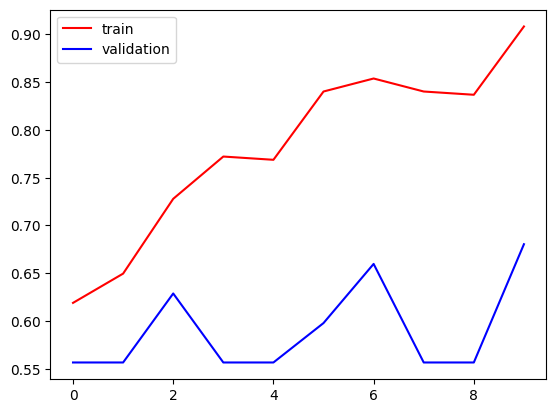

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

### Loss Plotting

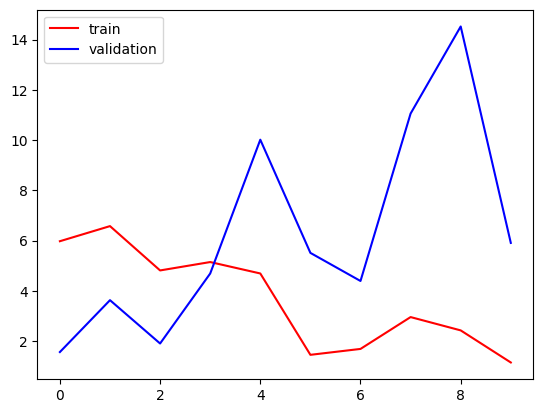

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Ways to reduce overfitting
1. Add more data
2. Data Augmentation
3. Dropout
4. Batch Norm
5. Reduce complexity

## Inference

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[160, 189, 203],
        [145, 182, 200],
        [157, 207, 230],
        ...,
        [144, 180, 242],
        [139, 177, 239],
        [135, 175, 236]],

       [[167, 223, 250],
        [139, 203, 231],
        [112, 185, 220],
        ...,
        [  4, 115, 158],
        [  2, 113, 156],
        [  0, 112, 154]],

       [[ 32, 115, 155],
        [ 32, 119, 162],
        [ 23, 118, 166],
        ...,
        [ 17, 124, 176],
        [ 16, 123, 175],
        [ 15, 122, 174]]], dtype=uint8)
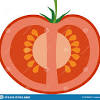

In [147]:
import cv2

bgr_img = cv2.imread("/content/train/tomatoes/img_p1_20.jpeg")
test_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
test_img

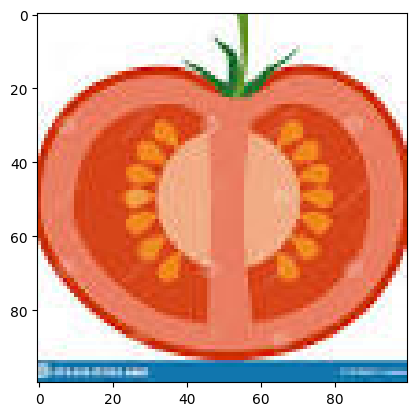

In [148]:
plt.imshow(test_img)

In [149]:
test_img.shape

(100, 100, 3)

In [150]:
test_img=cv2.resize(test_img,(256,256))

In [151]:
test_img.shape

(256, 256, 3)

In [152]:
test_input=test_img.reshape((1,256,256,3))

## Prediction

In [153]:
result=model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [154]:
result

array([[1.]], dtype=float32)